In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np
sns.set_style()

In [6]:
#read the file 
dff_00 = (pd.read_excel('deaths2000.xls', skiprows=6, sheet_name='Deaths All ages'))
df_00=dff_00.copy()

dff_16 = (pd.read_excel('deaths2016.xls', skiprows=6, sheet_name='Deaths All ages'))
df_16=dff_16.copy()

In [7]:
df_00 = df_00.drop([df_00.columns[1],df_00.columns[2],df_00.columns[3], df_00.columns[6]], axis=1)

df_16 = df_16.drop([df_16.columns[1],df_16.columns[2],df_16.columns[3], df_16.columns[6]], axis=1)

In [8]:
df_00 = df_00.drop((df_00[df_00.Sex =='Persons'].index))
df_00=df_00.dropna(subset=["Sex"])

df_16 = df_16.drop((df_16[df_16.Sex =='Persons'].index))
df_16=df_16.dropna(subset=["Sex"])

In [9]:
df_00 = df_00.rename(columns={df_00.columns[1]: 'General_cause', df_00.columns[2]: 'Detailed_cause'})
df_16 = df_16.rename(columns={df_16.columns[1]: 'General_cause', df_16.columns[2]: 'Detailed_cause'})


In [10]:
df_00 = df_00.dropna(subset=["General_cause", "Detailed_cause"], how='all')

df_16 = df_16.dropna(subset=["General_cause", "Detailed_cause"], how='all')

In [11]:
df_00=df_00.dropna(subset=["General_cause"])

df_16=df_16.dropna(subset=["General_cause"])

In [12]:
new_col00=[]

for i in df_00['General_cause']:
    if i[0].isdigit()==False:
        new_col00.append(i)
    else:
        new_col00.append(new_col00[-1])

new_col16=[]
for i in df_16['General_cause']:
    if i[0].isdigit()==False:
        new_col16.append(i)
    else:
        new_col16.append(new_col16[-1])


In [13]:
df_00 = df_00.drop(['General_cause'], axis=1)

df_16 = df_16.drop(['General_cause'], axis=1)

In [14]:

df_00.insert(1, 'General_cause', new_col00)

df_16.insert(1, 'General_cause', new_col16)

In [25]:
df_00 = df_00.dropna(subset=["Detailed_cause"])

df_16 = df_16.dropna(subset=["Detailed_cause"])

In [26]:
df_00 = df_00.replace('.', 0)
df_16 = df_16.replace('.', 0)


In [27]:
df_00 = df_00.reset_index()

df_16 = df_16.reset_index()

In [28]:
gdp = (pd.read_excel('gdp_per_capita.xls', skiprows=3, sheet_name='Data')
        .dropna(how='all', axis=1))

In [29]:
gdp = gdp[["Country Name","2000", "2016"]]

In [30]:
gdp= gdp.dropna(subset = ["2000", "2016"])

In [31]:
gdp= gdp.reset_index(drop=True)

In [32]:
country_labels= ['Low_income', 'Lower_middle_income', 'Upper_middle_income', 'High_income']
cutoffs = [0,995,3895,12055,200000]

In [33]:
Category_2000 = pd.cut(gdp['2000'],cutoffs, labels=country_labels)
gdp.insert(3, 'Category_2000', Category_2000)

In [34]:
Category_2016 = pd.cut(gdp['2016'],cutoffs, labels=country_labels)
gdp.insert(4, 'Category_2016', Category_2016)

In [35]:
#Year 2000
#Liste des pays low income ....
low_income_2000 = list(gdp['Country Name'].loc[gdp['Category_2000'] =='Low_income'])
Lower_middle_income_2000 = list(gdp['Country Name'].loc[gdp['Category_2000'] =='Lower_middle_income'])
Upper_middle_income_2000 = list(gdp['Country Name'].loc[gdp['Category_2000'] =='Upper_middle_income'])
High_income_2000= list(gdp['Country Name'].loc[gdp['Category_2000'] =='High_income'])
#Year 2016
low_income_2016 = list(gdp['Country Name'].loc[gdp['Category_2016'] =='Low_income'])
Lower_middle_income_2016 = list(gdp['Country Name'].loc[gdp['Category_2016'] =='Lower_middle_income'])
Upper_middle_income_2016 = list(gdp['Country Name'].loc[gdp['Category_2016'] =='Upper_middle_income'])
High_income_2016= list(gdp['Country Name'].loc[gdp['Category_2016'] =='High_income'])

In [36]:
# Year 2000
liste_category_2000=[low_income_2000,Lower_middle_income_2000,Upper_middle_income_2000,High_income_2000]
df_2000 = pd.DataFrame()
for cat in liste_category_2000:
    for cat1 in cat:
        if cat1 in df_00.columns:
            df_2000=df_2000.append(df_00[cat1])
            
# Year 2016          
liste_category_2016=[low_income_2016,Lower_middle_income_2016,Upper_middle_income_2016,High_income_2016]
df_2016 = pd.DataFrame()
for cat in liste_category_2016:
    for cat1 in cat:
        if cat1 in df_16.columns:
            df_2016=df_2016.append(df_16[cat1])
        

In [37]:
# Each dataframe contains the columns of the countries from the same category / year 2000

low_income_2000_df=df_00.loc[:,[i in low_income_2000 for i in df_00.columns]]
low_middle_income_2000_df=df_00.loc[:,[i in Lower_middle_income_2000 for i in df_00.columns]]
up_middle_income_2000_df=df_00.loc[:,[i in Upper_middle_income_2000 for i in df_00.columns]]
high_income_2000_df=df_00.loc[:,[i in High_income_2000 for i in df_00.columns]]

# Each dataframe contains the columns of the countries from the same category / year 2016

low_income_2016_df=df_16.loc[:,[i in low_income_2016 for i in df_16.columns]]
low_middle_income_2016_df=df_16.loc[:,[i in Lower_middle_income_2016 for i in df_16.columns]]
up_middle_income_2016_df=df_16.loc[:,[i in Upper_middle_income_2016 for i in df_16.columns]]
high_income_2016_df=df_16.loc[:,[i in High_income_2016 for i in df_16.columns]]


In [38]:

# sum of columns of each dataframe / year 2000
low_income_2000_mean = low_income_2000_df.mean(axis = 1) 
low_middle_income_2000_mean=low_middle_income_2000_df.mean(axis=1)
up_middle_income_2000_mean=up_middle_income_2000_df.mean(axis=1)
high_income_2000_mean=high_income_2000_df.mean(axis=1)

# sum of columns of each dataframe / year 2016
low_income_2016_mean = low_income_2016_df.sum(axis = 1) 
low_middle_income_2016_mean=low_middle_income_2016_df.mean(axis=1)
up_middle_income_2016_mean=up_middle_income_2016_df.mean(axis=1)
high_income_2016_mean=high_income_2016_df.mean(axis=1)


In [39]:
df_clean = df_00[['Sex','General_cause','Detailed_cause']]

df_clean['low_income_2000']=low_income_2000_mean
df_clean['low_middle_income_2000']=low_middle_income_2000_mean
df_clean['up_middle_income_2000']=up_middle_income_2000_mean
df_clean['high_income_2000']=high_income_2000_mean
df_clean['low_income_2016']=low_income_2016_mean
df_clean['low_middle_income_2016']=low_middle_income_2016_mean
df_clean['up_middle_income_2016']=up_middle_income_2016_mean
df_clean['high_income_2016']=high_income_2016_mean



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [40]:
import geopandas 
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

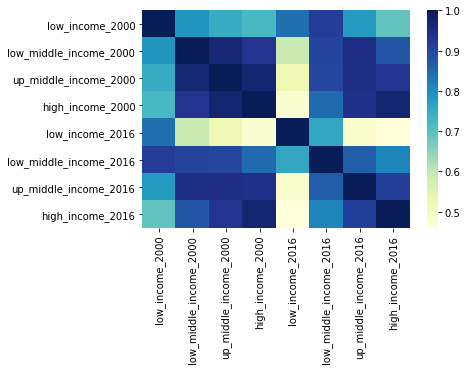

In [41]:
sns.heatmap(df_clean.corr(), cmap='YlGnBu')

In [42]:
#low_income_2000_df=df_00.loc[:,[i in low_income_2000 for i in df_00.columns]]
#world['Name'].loc[gdp['Category_2000'] =='Lower_middle_income'])

df_16.columns[4:]

Index(['Detailed_cause', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'United Republic of Tanzania', 'United States of America', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela (Bolivarian Republic of)',
       'Viet Nam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=184)

In [44]:
df_16.describe()

,level_0,index,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
count,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,2.320000e+02,232.000000,232.000000,232.000000,...,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000,232.000000
mean,115.500000,429.370690,1.017279,0.110283,0.773249,0.939869,2.501931e-03,1.348265,0.116257,0.658657,...,1.677387,11.610711,0.134903,0.710985,0.005279,0.700715,2.260922,0.713537,0.520271,0.529884
std,67.116814,117.348191,2.475744,0.437070,2.349277,2.104557,6.072802e-03,3.180596,0.441655,1.557360,...,3.560536,29.988725,0.290884,3.191987,0.013686,2.086964,5.745518,1.974594,1.284303,1.587498
min,0.000000,213.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.750000,330.750000,0.011669,0.000301,0.004910,0.010397,6.079243e-08,0.016982,0.000307,0.007593,...,0.021058,0.164668,0.002572,0.004064,0.000037,0.007201,0.017031,0.006838,0.006261,0.005174
50%,115.500000,416.500000,0.156544,0.010714,0.134883,0.135320,4.006266e-04,0.245671,0.009581,0.103856,...,0.235235,1.721555,0.026767,0.077873,0.001112,0.147551,0.298034,0.132156,0.076147,0.098544
75%,173.250000,537.250000,0.817776,0.050806,0.595998,0.706516,2.009879e-03,1.121519,0.066013,0.740002,...,1.422221,11.437216,0.121135,0.386196,0.005035,0.516010,1.670680,0.577538,0.375288,0.382938
max,231.000000,620.000000,18.635966,4.250377,23.442850,12.268585,4.912306e-02,24.111959,4.552098,12.597556,...,21.023883,278.093794,2.099817,34.968302,0.134562,19.756148,48.375764,19.256564,11.286116,15.103736


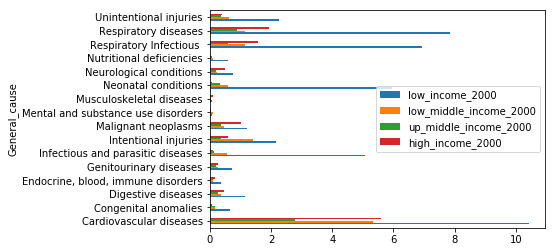

In [44]:
df_clean.loc[:,'General_cause':'high_income_2000'].groupby(["General_cause"]).agg("mean").plot.barh()


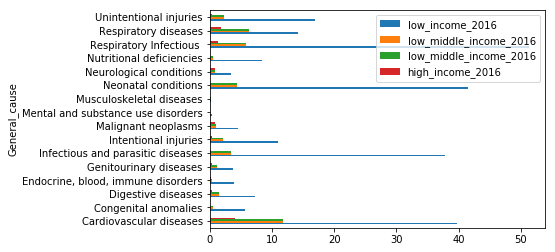

In [45]:
df_clean.loc[:,['General_cause','low_income_2016','low_middle_income_2016','low_middle_income_2016','high_income_2016']].groupby(["General_cause"]).agg("mean").plot.barh()


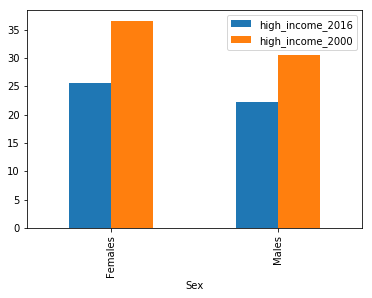

In [47]:
dfdf=df_clean[df_clean['General_cause']=="Cardiovascular diseases"]
dfdf.loc[:,['Sex','high_income_2016','high_income_2000']].groupby(['Sex']).agg('sum').plot.bar()

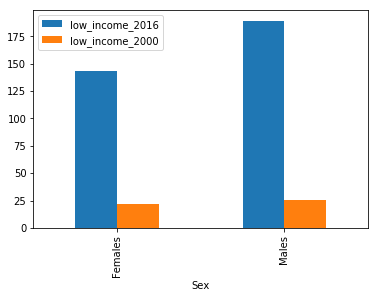

In [48]:
dfdf=df_clean[df_clean['General_cause']=="Neonatal conditions"]
dfdf.loc[:,['Sex','low_income_2016','low_income_2000']].groupby(['Sex']).agg('sum').plot.bar()

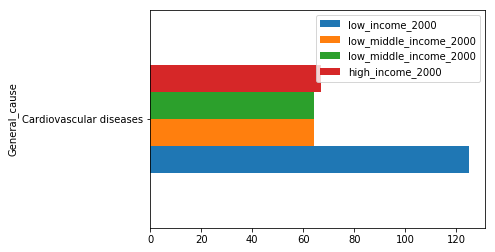

In [61]:

dfdf.loc[:,['General_cause','low_income_2000','low_middle_income_2000','low_middle_income_2000','high_income_2000']].groupby(['General_cause']).agg('sum').plot.barh()


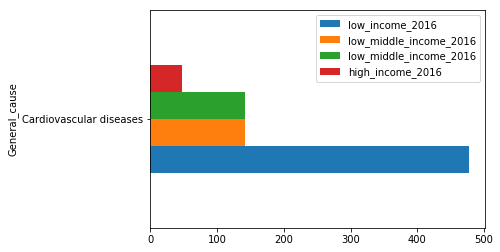

In [51]:
dfdf.loc[:,['General_cause','low_income_2016','low_middle_income_2016','low_middle_income_2016','high_income_2016']].groupby(['General_cause']).agg('sum').plot.barh()


In [52]:
import geopandas 
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [53]:
A = df_16.loc[:,'Afghanistan':'Zimbabwe'][df_16['General_cause']=="Cardiovascular diseases"]
B = A.sum(axis = 0, skipna = True) 
lst=[]
for i in world['name']:
    if i in B.index:        
            lst.append(B[i])
    
    else:
            lst.append(np.nan)
        
world['deaths']=lst

In [54]:
world=world.dropna(subset=["deaths"])

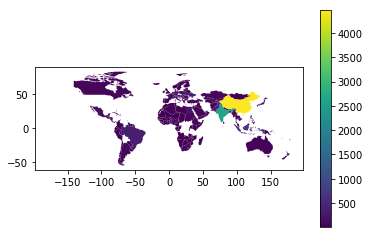

In [69]:

world.plot(column='deaths',legend=True);

In [74]:
A = df_16.loc[:,'Afghanistan':'Zimbabwe'][df_16['General_cause']=="Infectious and parasitic diseases"]
B = A.sum(axis = 0, skipna = True) 
lst=[]
for i in world['name']:
    if i in B.index:        
            lst.append(B[i])
    
    else:
            lst.append(np.nan)
        
world['infectious']=lst

In [75]:
world=world.dropna(subset=["infectious"])

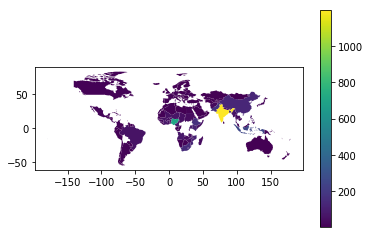

In [76]:
world.plot(column='infectious',legend=True);

In [79]:
A = df_16.loc[:,'Afghanistan':'Zimbabwe'][df_16['General_cause']=="Malignant neoplasms"]
B = A.sum(axis = 0, skipna = True) 
lst=[]
for i in world['name']:
    if i in B.index:        
            lst.append(B[i])
    
    else:
            lst.append(np.nan)
        
world['cancers']=lst

In [ ]:
world=world.dropna(subset=["cancers"])

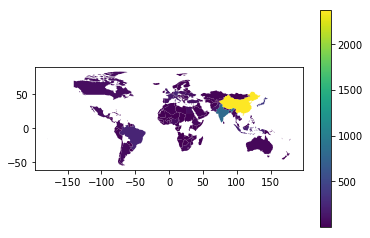

In [80]:
world.plot(column='cancers',legend=True);

In [82]:
B

Afghanistan                                   19.964782
Albania                                        5.138363
Algeria                                       25.166019
Angola                                         8.455343
Antigua and Barbuda                            0.133512
Argentina                                     65.657452
Armenia                                        7.953218
Australia                                     45.748525
Austria                                       20.898537
Azerbaijan                                    10.136275
Bahamas                                        0.531966
Bahrain                                        0.456166
Bangladesh                                    99.619966
Barbados                                       0.731607
Belarus                                       18.808019
Belgium                                       28.806920
Belize                                         0.287289
Benin                                          3

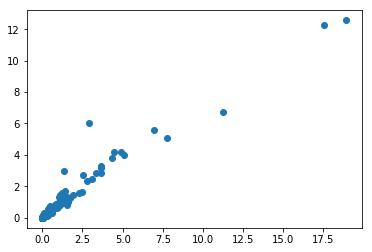

In [66]:
plt.scatter(df_clean['high_income_2000'], df_clean['high_income_2016'])


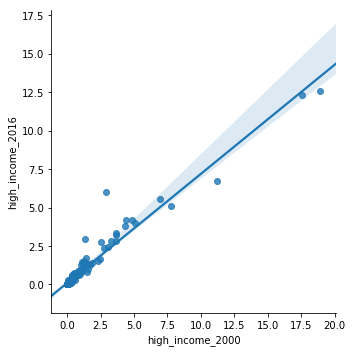

In [68]:
sns.lmplot('high_income_2000','high_income_2016',data=df_clean)


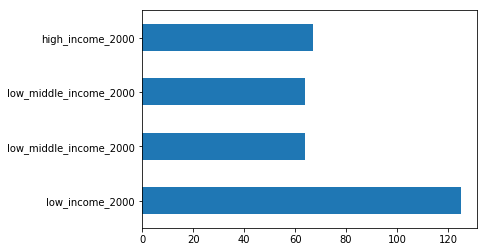

In [93]:
dfdf=df_clean[df_clean['General_cause']=="Cardiovascular diseases"]


dfdf.loc[:,['low_income_2000','low_middle_income_2000','low_middle_income_2000','high_income_2000']].sum(axis=0).plot.barh()




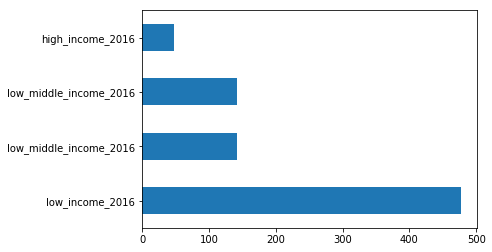

In [97]:
dfdf=df_clean[df_clean['General_cause']=="Cardiovascular diseases"]


dfdf.loc[:,['low_income_2016','low_middle_income_2016','low_middle_income_2016','high_income_2016']].sum(axis=0).plot.barh()



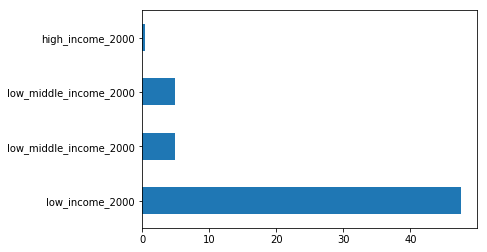

In [94]:
dfdf=df_clean[df_clean['General_cause']=="Neonatal conditions"]

dfdf.loc[:,['low_income_2000','low_middle_income_2000','low_middle_income_2000','high_income_2000']].sum(axis=0).plot.barh()



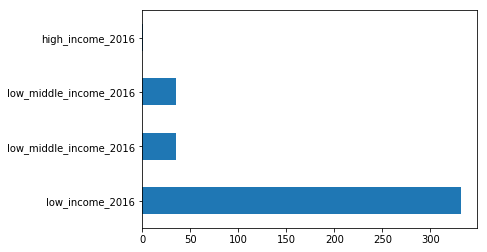

In [98]:
dfdf=df_clean[df_clean['General_cause']=="Neonatal conditions"]

dfdf.loc[:,['low_income_2016','low_middle_income_2016','low_middle_income_2016','high_income_2016']].sum(axis=0).plot.barh()


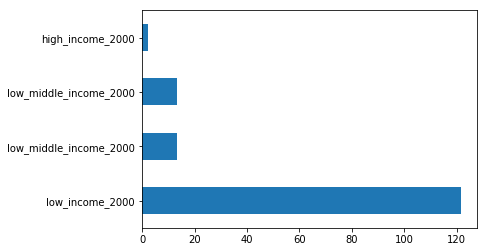

In [95]:
dfdf=df_clean[df_clean['General_cause']=="Infectious and parasitic diseases"]

dfdf.loc[:,['low_income_2000','low_middle_income_2000','low_middle_income_2000','high_income_2000']].sum(axis=0).plot.barh()



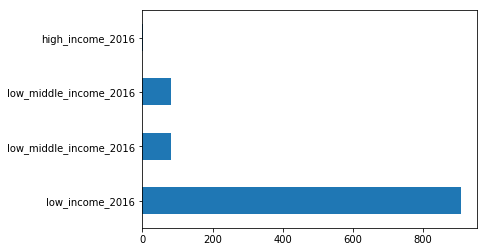

In [99]:
dfdf=df_clean[df_clean['General_cause']=="Infectious and parasitic diseases"]

dfdf.loc[:,['low_income_2016','low_middle_income_2016','low_middle_income_2016','high_income_2016']].sum(axis=0).plot.barh()


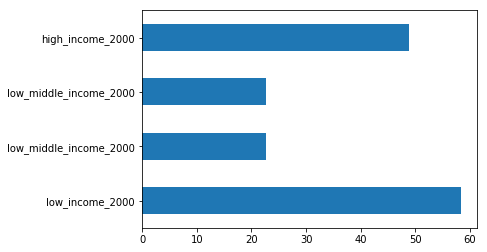

In [96]:
dfdf=df_clean[df_clean['General_cause']=="Malignant neoplasms"]
dfdf.loc[:,['low_income_2000','low_middle_income_2000','low_middle_income_2000','high_income_2000']].sum(axis=0).plot.barh()



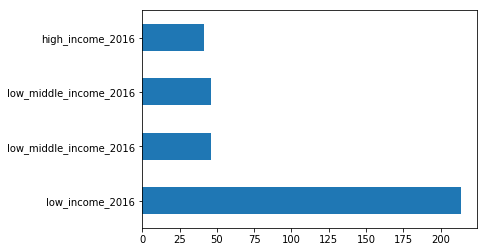

In [100]:
dfdf=df_clean[df_clean['General_cause']=="Malignant neoplasms"]
dfdf.loc[:,['low_income_2016','low_middle_income_2016','low_middle_income_2016','high_income_2016']].sum(axis=0).plot.barh()
